In [153]:
import os
import pandas as pd
import itables
from utils import get_eval_report, melt_rouge_scores, pivot_df

itables.init_notebook_mode(all_interactive=True)

In [195]:
g1_df = get_eval_report('expiriments/ozwell/g1', 'eval_report.json', True, True)
g1_df['prompt'] = 'g1'
g2_df = get_eval_report('expiriments/ozwell/g2', 'eval_report.json', True, True)
g2_df['prompt'] = 'g2'
df = pd.concat([g1_df, g2_df], ignore_index=True)
melted_df = melt_rouge_scores(df)
table_df = pivot_df(melted_df, ['rouge_type', 'prompt', 'standard_note_path', 'standard_basename', 'gen_note_path', 'gen_basename', 'idx']) # full table of ROUGE scores for both prompts
# table_df = pivot_df(melted_df, ['rouge_type', 'prompt', 'standard_basename'], aggfunc='mean') # averages prompts seperately for each standard basename
# table_df = pivot_df(melted_df, ['rouge_type', 'prompt', 'standard_basename', 'idx'], aggfunc='mean') # averages prompts together for each standard basename
# table_df = pivot_df(melted_df, ['rouge_type', 'standard_basename'], aggfunc='mean') # averages prompts seperately for each standard basename for each idx
# table_df = pivot_df(melted_df, ['rouge_type', 'standard_basename', 'idx'], aggfunc='mean') # averages prompts together for each standard basename for each idx
caption = 'ROUGE scores'
itables.show(table_df, caption=caption, layout={"top1": "searchBuilder"},  buttons=["columnsToggle"])

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


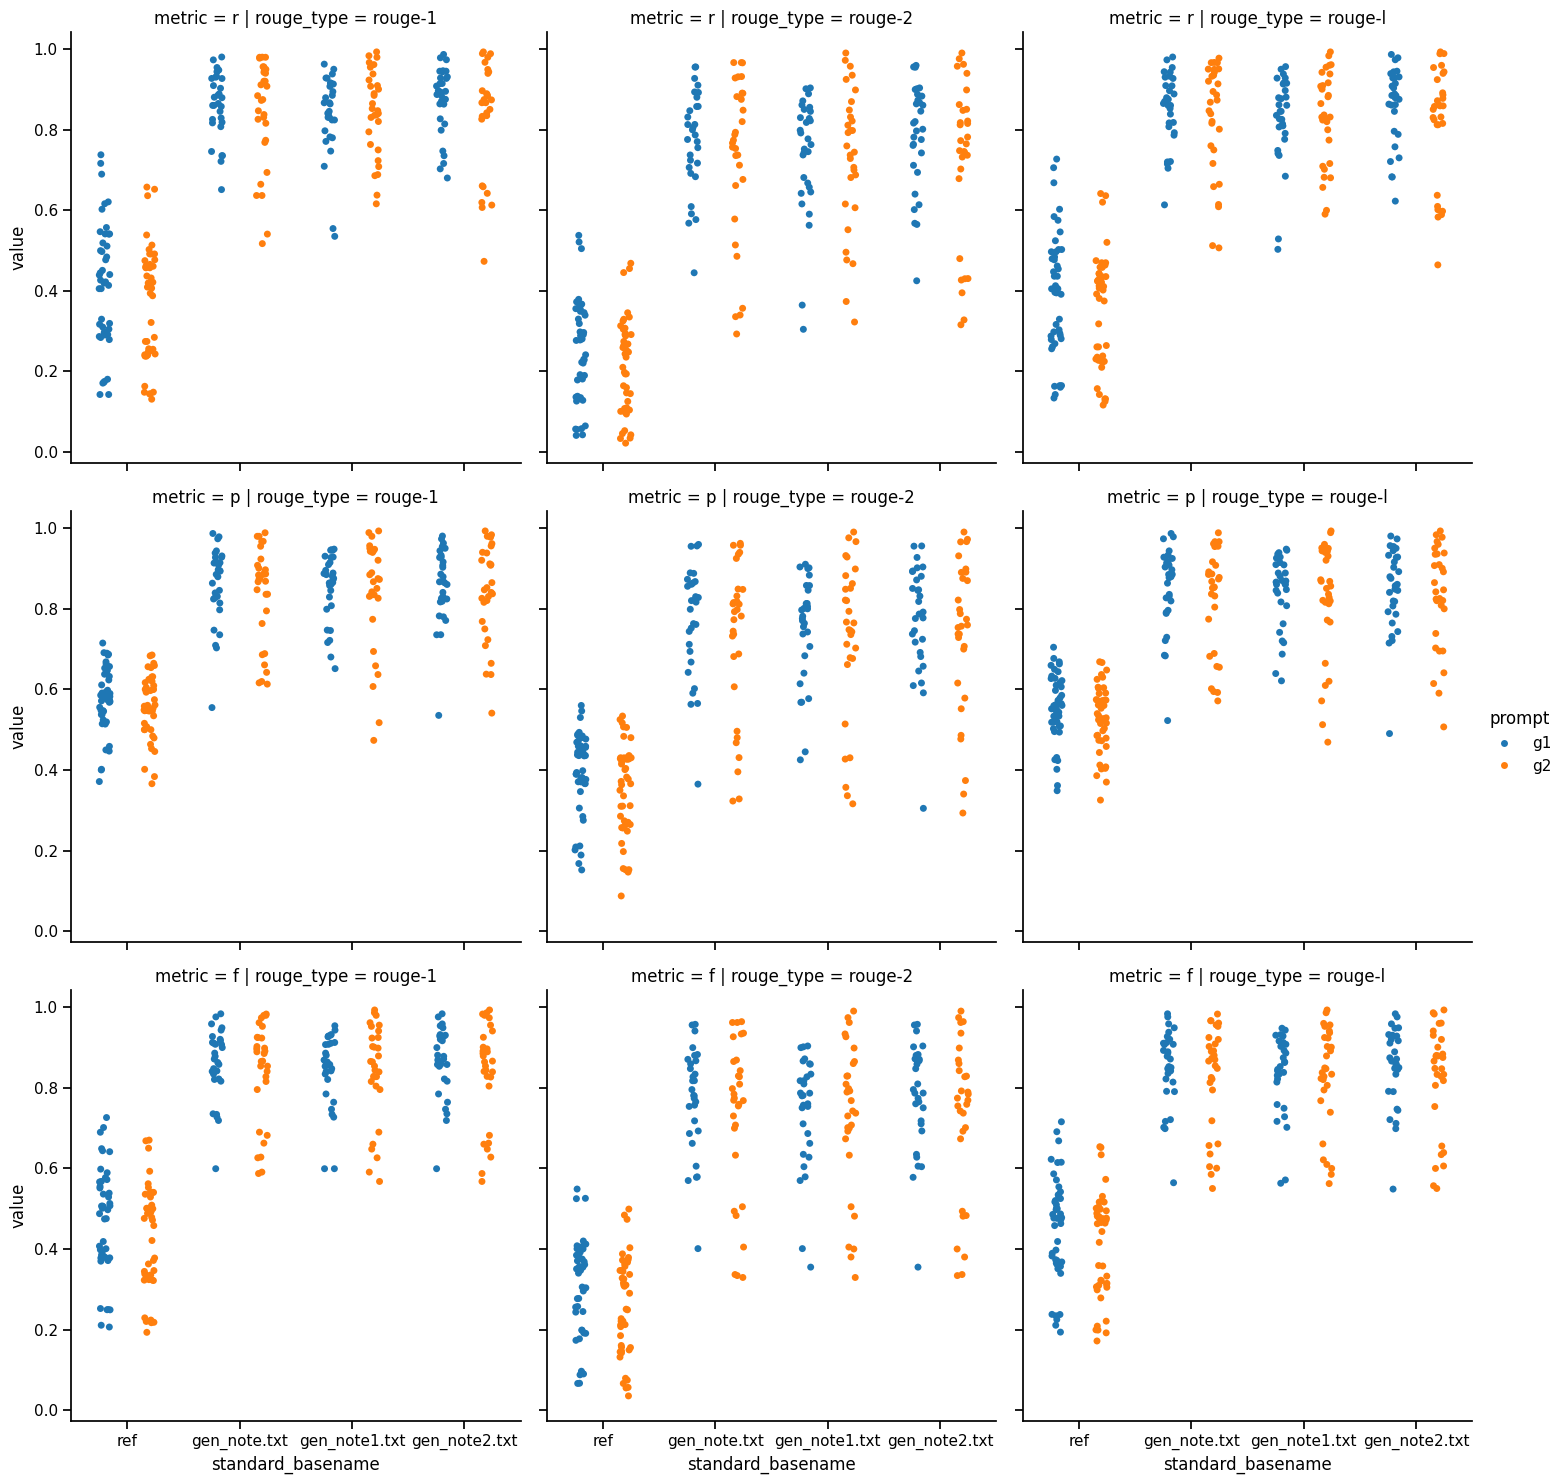

In [441]:
import seaborn as sns

sns.set_context("notebook")
x_col_name = 'standard_basename'
hue_col_name = 'prompt'
title = f'rouge_{x_col_name}_by_{hue_col_name}.png'
save_path = f'expiriments/{title}'

g = sns.catplot(melted_df, row='metric', col='rouge_type', x=x_col_name, y='value', hue=hue_col_name, dodge=True, legend='full')
g.savefig(save_path)

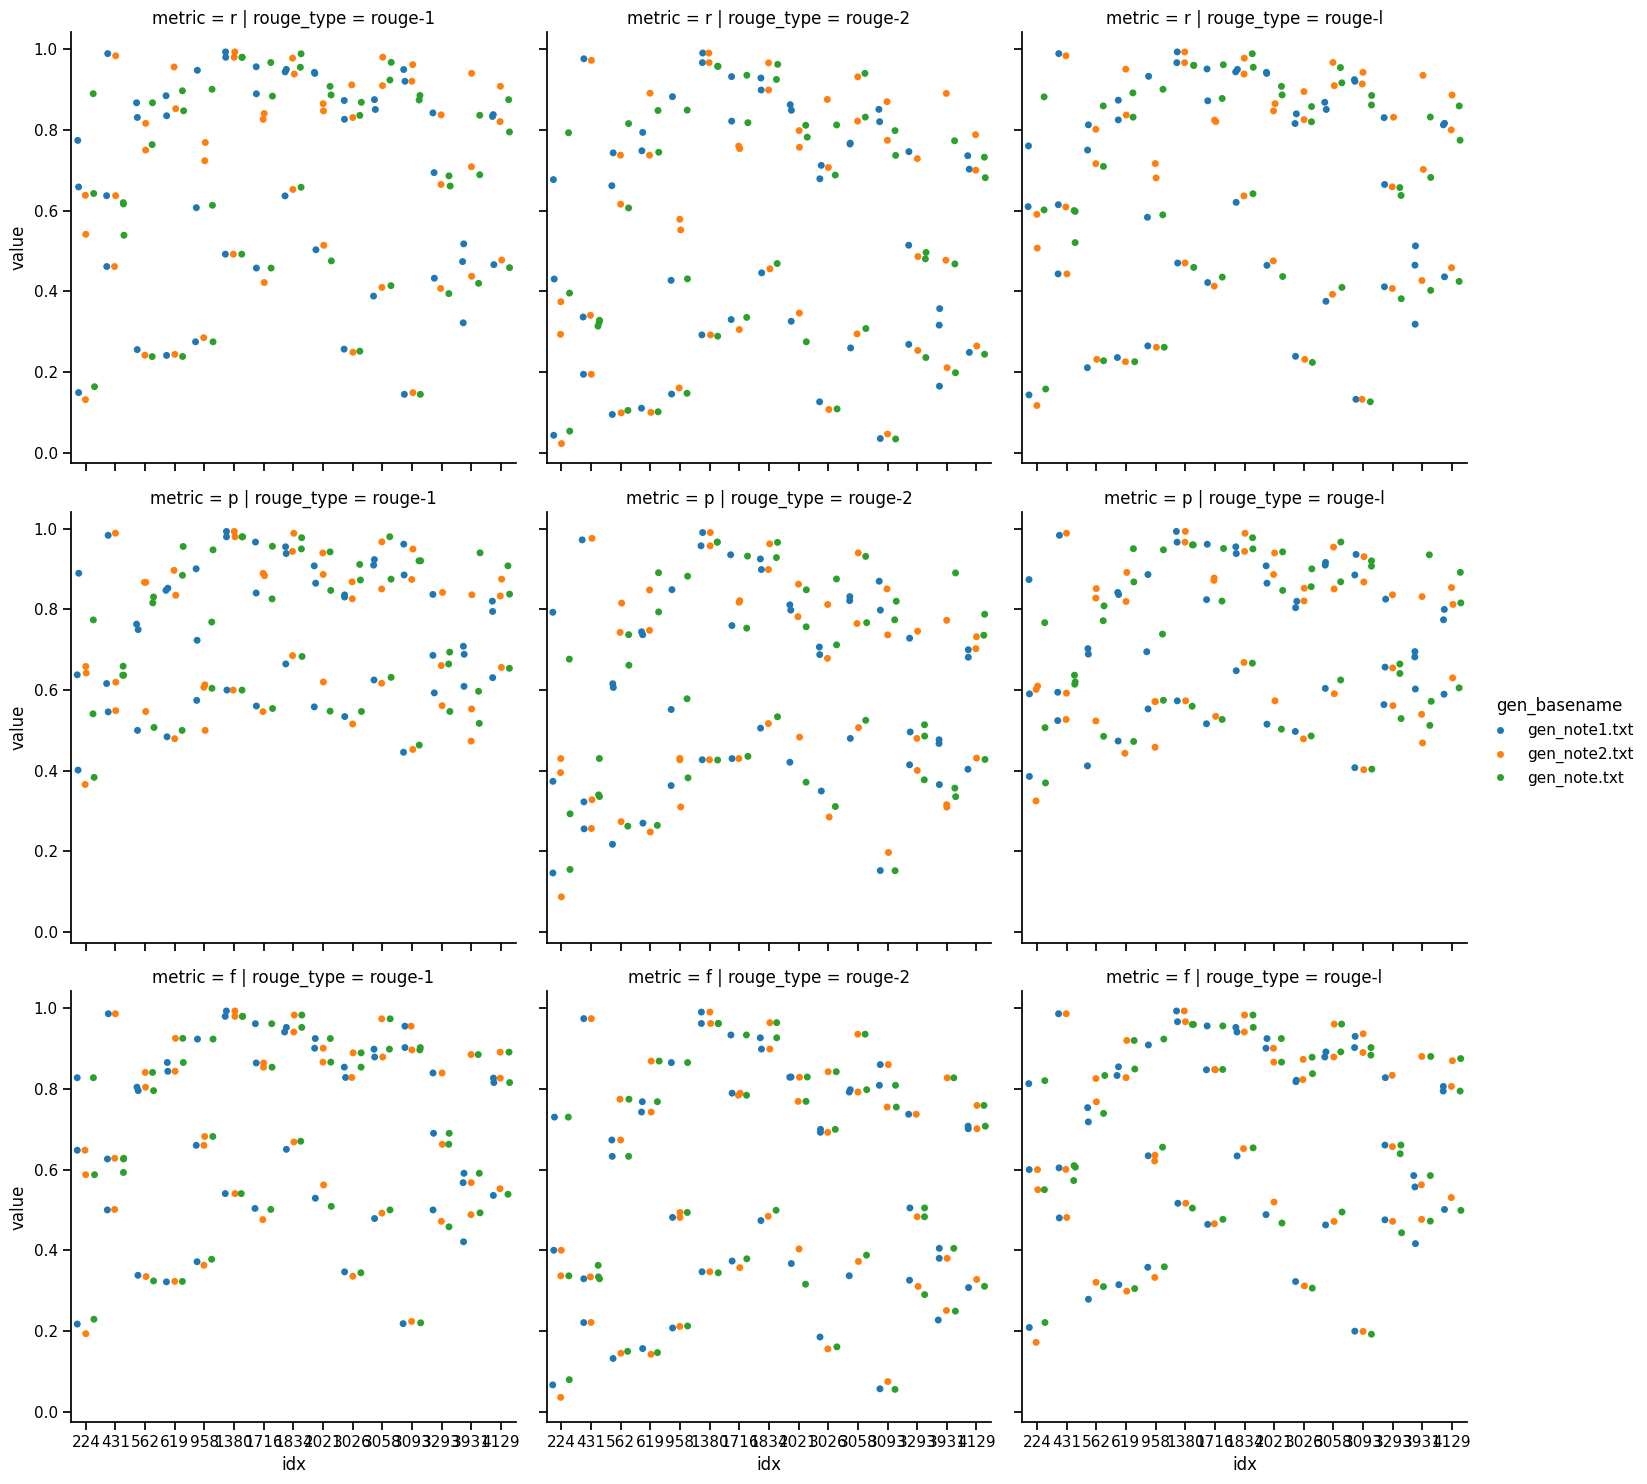

In [434]:
x_col_name = 'idx'
hue_col_name = 'standard_basename'
prompt_name = 'g2'
title = f'rouge_{x_col_name}_by_{hue_col_name}.png'
save_path = f'expiriments/ozwell/{prompt_name}/plots/{title}'

g = sns.catplot(melted_df[melted_df['prompt'] == prompt_name], row='metric', col='rouge_type', x=x_col_name, y='value', hue='gen_basename', dodge=True, legend='full')
g.savefig(save_path)